In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from AutoEncoder import *
%matplotlib inline
import matplotlib.pyplot as plt
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
training = mnist.train
test = mnist.test
batch_size = 15
epoch = 30
param = {
    'learning_rate':0.9,
    'labels':10
}
loss_history=[]
val_loss_history=[]
X = tf.placeholder(dtype=tf.float32,shape=[batch_size,784],name="input")
encoder = AutoEncoder(params=param)
model = encoder.model(X)


In [3]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
total_batch = int(training.num_examples / batch_size)
for i in range(epoch):
    tmp_loss_history = []
    tmp_val_loss_history = []
    for j in range(total_batch):
            batch_x,_ = training.next_batch(batch_size)
            loss,_ = sess.run([encoder.loss,encoder.optim],feed_dict={X:batch_x})
            tmp_loss_history.append(loss)
            val_loss = sess.run(encoder.loss,feed_dict = {X:test.images[0:batch_size]})
            tmp_val_loss_history.append(val_loss)
    loss_history.append(np.mean(tmp_loss_history))
    val_loss_history.append(np.mean(tmp_val_loss_history))
            

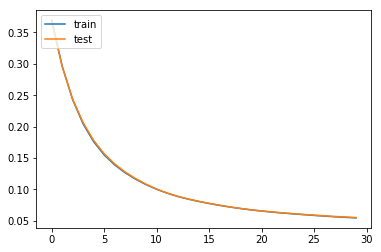

In [4]:
plt.plot(loss_history)
plt.plot(val_loss_history)
plt.legend(['train','test'],loc='upper left')
plt.show()

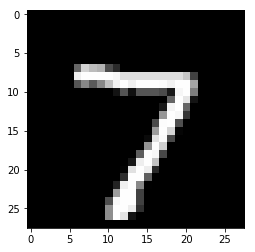

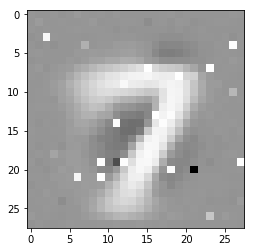

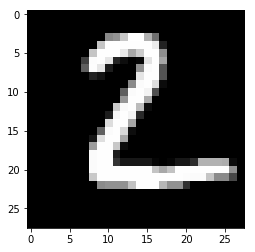

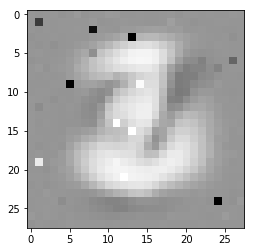

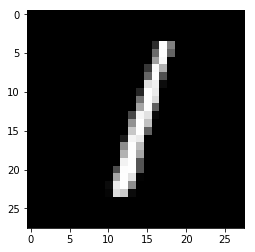

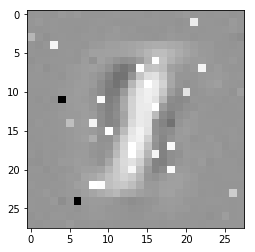

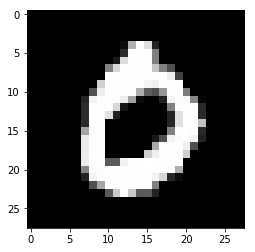

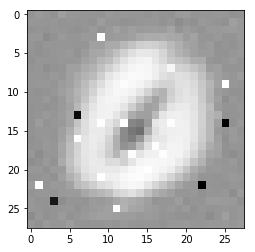

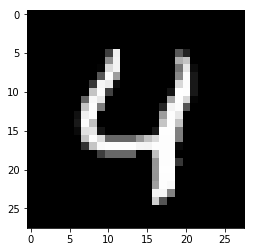

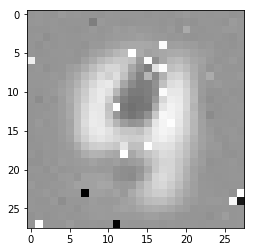

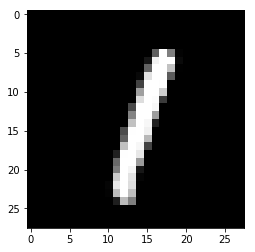

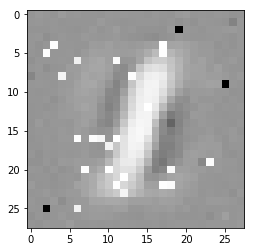

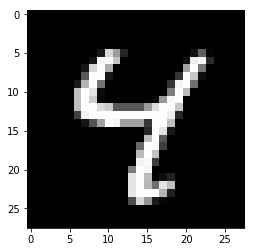

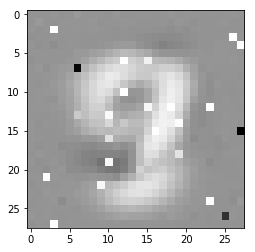

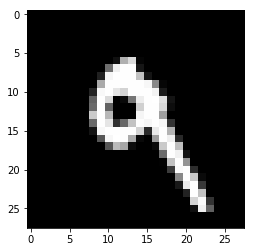

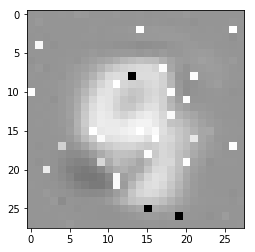

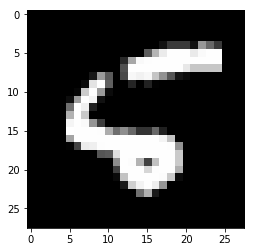

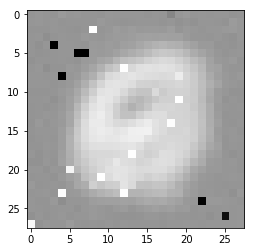

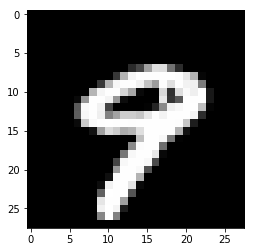

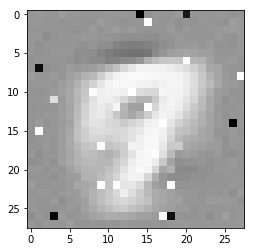

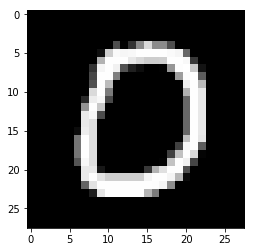

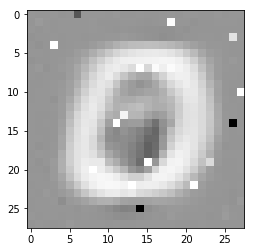

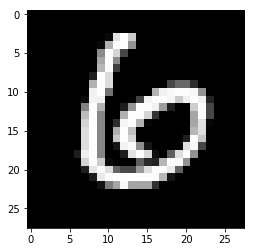

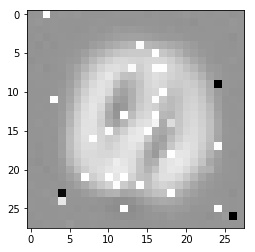

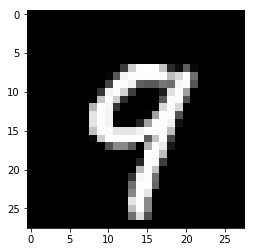

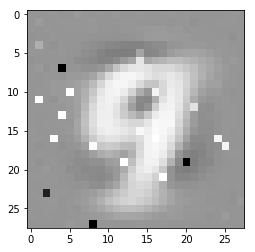

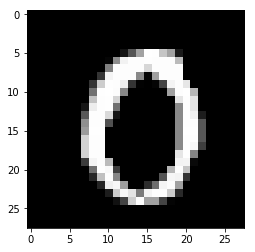

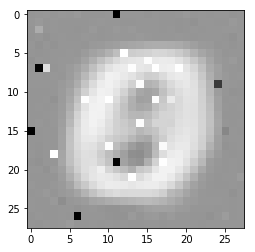

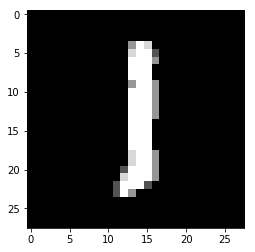

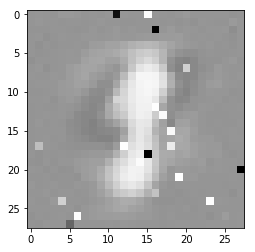

In [5]:
t = sess.run(encoder.out, feed_dict ={X:test.images[0:batch_size]})
for i in range(batch_size):
    plt.imshow(test.images[i].reshape(28,28),cmap='Greys_r')
    plt.show()
    plt.imshow(t[i].reshape(28,28),cmap = 'Greys_r')
    plt.show()